In [94]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

**INTRODUCCIÓN**

El objetivo de nuestra investigación es ahondar en el mundo laboral *data*. Para ello hemos buscado 4 bases de datos, cada una de ellas referida a un trabajo específico, a saber: 1) analista de datos, 2) científico de datos, 3) ingeniero de datos, 4) analista de negocios. ¿Qué ofrece el mercado laboral para estos puestos? ¿qué formación pide? ¿qué rango salarial puede esperarse? ¿cómo puedo adaptar mi CV y mi LinkedIn para ser más atractivo de cara al puesto que quiero desempeñar? Estas y otras preguntas han guiado la investigación. Sin más, comencemos.

Unimos las 4 bases de datos en una sola para facilitar nuestro trabajo.

In [95]:
data_ds=pd.read_csv('../input/visualizacion/DataScientist.csv')
data_da=pd.read_csv('../input/visualizacion/DataAnalyst.csv')
data_de=pd.read_csv('../input/visualizacion/DataEngineer.csv')
data_ba=pd.read_csv('../input/visualizacion/BusinessAnalyst.csv')
data_ds = data_ds.drop(['Unnamed: 0','index'],axis=1)
data_da = data_da.drop(['Unnamed: 0'],axis=1)
data_ba = data_ba.drop(['Unnamed: 0','index'],axis=1).head(3692)
data = pd.concat([data_ds,data_da,data_de,data_ba]).reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: '../input/visualizacion/DataScientist.csv'

Realizamos una primera observación de qué hay en nuestra base de datos.

In [ ]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


Exploramos la presencia de datos nulos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12382 entries, 0 to 12381
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          12382 non-null  object
 1   Salary Estimate    12382 non-null  object
 2   Job Description    12382 non-null  object
 3   Rating             12382 non-null  object
 4   Company Name       12381 non-null  object
 5   Location           12382 non-null  object
 6   Headquarters       12382 non-null  object
 7   Size               12382 non-null  object
 8   Founded            12382 non-null  object
 9   Type of ownership  12382 non-null  object
 10  Industry           12382 non-null  object
 11  Sector             12382 non-null  object
 12  Revenue            12382 non-null  object
 13  Competitors        12382 non-null  object
 14  Easy Apply         12382 non-null  object
dtypes: object(15)
memory usage: 1.4+ MB


**LIMPIEZA Y MANIPULACIÓN DE LOS DATOS**

***TRABAJOS***

Tras observar qué trabajos hay en nuestra base de datos, observamos que muchos de ellos se encuentran repetidos. Esto se debe a que nuestra búsqueda es por coincidencia de determinadas cadenas de strings, por consiguiente, oficios como "Sr. Data Analyst" y "Sr Data Analyst" se cuenten por separado. La primera labor será explorar la base de datos para aunar aquellas expresiones que, si bien tienen una ortografía diferente, remiten a los mismos puestos.

In [ ]:
data['Job Title'].value_counts()[:50]

Job Title
Data Analyst                                 801
Data Engineer                                729
Business Analyst                             502
Data Scientist                               282
Senior Data Analyst                          143
Senior Data Engineer                         140
Business Systems Analyst                     118
Big Data Engineer                            114
Software Engineer                             93
Senior Data Scientist                         91
Business Intelligence Analyst                 89
Senior Business Analyst                       68
Machine Learning Engineer                     64
Business Data Analyst                         52
Junior Data Analyst                           48
Sr. Data Engineer                             48
Technical Business Analyst                    36
Sr. Data Analyst                              32
Sr. Business Analyst                          32
IT Business Analyst                           30
Business S

In [ ]:
data['Job Title']= data['Job Title'].str.replace ('Sr. Data Analyst','Senior Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Sr Data Analyst','Senior Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Data Analyst Senior','Senior Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Data Analyst III','Senior Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Lead Data Analyst','Senior Data Analyst')

data['Job Title']= data['Job Title'].str.replace ('Jr. Data Analyst','Junior Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Jr Data Analyst','Junior Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Data Analyst Junior','Junior Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Data Analyst I','Junior Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Data Analyst II','Junior Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Junior Data AnalystI','Junior Data Analyst')

data['Job Title']= data['Job Title'].str.replace ('Sr. Business Analyst','Senior Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Business Analyst III','Senior Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Senior Business Systems Analyst','Senior Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Business Analyst II','Senior Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Sr Business Analyst','Senior Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Business Intelligence Engineer','Senior Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Business Analyst IV','Senior Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Federal - Senior Business Analyst','Senior Business Analyst')

data['Job Title']= data['Job Title'].str.replace ('Sr. Data Engineer','Senior Data Engineer')
data['Job Title']= data['Job Title'].str.replace ('Sr Data Engineer','Senior Data Engineer')
data['Job Title']= data['Job Title'].str.replace ('Lead Data Engineer','Senior Data Engineer')
data['Job Title']= data['Job Title'].str.replace ('Data Engineer II','Senior Data Engineer')
data['Job Title']= data['Job Title'].str.replace ('Senior Big Data Engineer','Senior Data Engineer')
data['Job Title']= data['Job Title'].str.replace ('Federal - Data Engineer - Senior','Senior Data Engineer')
data['Job Title']= data['Job Title'].str.replace ('Principal Data Engineer','Senior Data Engineer')
data['Job Title']= data['Job Title'].str.replace ('Senior Data EngineerI','Senior Data Engineer')
    
data['Job Title']= data['Job Title'].str.replace ('Lead Data Scientist','Senior Data Scientist')
data['Job Title']= data['Job Title'].str.replace ('Principal Data Scientist','Senior Data Scientist')
data['Job Title']= data['Job Title'].str.replace ('Sr. Data Scientist','Senior Data Scientist')
data['Job Title']= data['Job Title'].str.replace ('Quantum Senior Data Data Scientist (Industrial-Discrete sector)','Senior Data Scientist')
data['Job Title']= data['Job Title'].str.replace ('Quantum Senior Data Data Scientist (Industrial-Process sector)','Senior Data Scientist')

data['Job Title']= data['Job Title'].str.replace ('Business Systems Analyst','Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Business Intelligence Analyst','Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Business Data Analyst','Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Technical Business Analyst','Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Business System Analyst','Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Data Management Analyst','Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('IT Business Analyst','Business Analyst')
data['Job Title']= data['Job Title'].str.replace ('Business Process Analyst','Business Analyst')

data['Job Title']= data['Job Title'].str.replace ('Big Data Engineer','Data Engineer')
data['Job Title']= data['Job Title'].str.replace ('Data Engineer I ','Data Engineer')
                                                    
data['Job Title']= data['Job Title'].str.replace ('Data Governance Analyst','Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Data Reporting Analyst','Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Research Data Analyst ','Data Analyst')
data['Job Title']= data['Job Title'].str.replace ('Research Data Analyst','Data Analyst')

data['Job Title']= data['Job Title'].str.replace ('Data Scientist - Nationwide Opportunities','Data Scientist')
data['Job Title']= data['Job Title'].str.replace ('Statistician (Data Scientist) *12 month Roster* *Direct Hire*','Data Scientist')
data['Job Title']= data['Job Title'].str.replace ('Scientist','Data Scientist')
data['Job Title']= data['Job Title'].str.replace ('Research Data Scientist','Data Scientist')
data['Job Title']= data['Job Title'].str.replace ('Data Data Scientist','Data Scientist')



Vemos el resultado de nuestra acción. Los valores de los principales trabajos ofertados ha aumentado (es decir, hemos agrupado con éxito).

In [ ]:
data['Job Title'].value_counts()[:20]

Job Title
Business Analyst                       889
Data Analyst                           847
Data Engineer                          843
Data Scientist                         347
Senior Data Engineer                   290
Senior Data Analyst                    239
Senior Business Analyst                212
Senior Data Scientist                  163
Junior Data Analyst                    123
Software Engineer                       93
Machine Learning Engineer               64
Systems Analyst                         25
Financial Analyst                       25
Salesforce Business Analyst             22
Project Analyst                         21
Management Analyst                      21
Data Quality Analyst                    19
Data Modeler                            18
Microsoft Dynamics CRM Data Analyst     18
Entry Level Business Analyst            17
Name: count, dtype: int64

***SALARIO***

Nuestra base de datos ofrece los rangos salariales con un formato que no nos permite realizar cálculos. Nuestro objetivo será *limpiar* aquellos caracteres que nos puedan entorpecer el proceso y cambiarlo a tipo float. Al hilo que hacemos esto crearemos las columnas de salario mínimo, máximo y medio.

In [ ]:
data['Salary Estimate']

0        $111K-$181K (Glassdoor est.)
1        $111K-$181K (Glassdoor est.)
2        $111K-$181K (Glassdoor est.)
3        $111K-$181K (Glassdoor est.)
4        $111K-$181K (Glassdoor est.)
                     ...             
12377     $58K-$103K (Glassdoor est.)
12378     $58K-$103K (Glassdoor est.)
12379     $58K-$103K (Glassdoor est.)
12380     $58K-$103K (Glassdoor est.)
12381     $58K-$103K (Glassdoor est.)
Name: Salary Estimate, Length: 12382, dtype: object

In [ ]:
data['Salary Estimate'] = data['Salary Estimate'].str[:-17]
data['Salary Estimate']

0        $111K-$181K
1        $111K-$181K
2        $111K-$181K
3        $111K-$181K
4        $111K-$181K
            ...     
12377     $58K-$103K
12378     $58K-$103K
12379     $58K-$103K
12380     $58K-$103K
12381     $58K-$103K
Name: Salary Estimate, Length: 12382, dtype: object

In [ ]:
data['Salary_minimum']= data['Salary Estimate'].str.lstrip('$').str[:3].str.replace('K','').str.strip()
data['Salary_minimum']

0        111
1        111
2        111
3        111
4        111
        ... 
12377     58
12378     58
12379     58
12380     58
12381     58
Name: Salary_minimum, Length: 12382, dtype: object

In [ ]:
data['Salary_minimum'] = pd.to_numeric(data['Salary_minimum'], errors='coerce')

In [ ]:
data['Salary_minimum'] = data['Salary_minimum'].astype('float')
data['Salary_minimum']

0        111.0
1        111.0
2        111.0
3        111.0
4        111.0
         ...  
12377     58.0
12378     58.0
12379     58.0
12380     58.0
12381     58.0
Name: Salary_minimum, Length: 12382, dtype: float64

In [ ]:
data['Salary_maximum'] = data['Salary Estimate'].str[6:].str.replace('K','').str.lstrip('$').str.strip(' Per Hou')
data['Salary_maximum']

0        181
1        181
2        181
3        181
4        181
        ... 
12377    103
12378    103
12379    103
12380    103
12381    103
Name: Salary_maximum, Length: 12382, dtype: object

In [ ]:
data['Salary_maximum'] = pd.to_numeric(data['Salary_maximum'], errors='coerce')

In [ ]:
data['Salary_maximum'] = data['Salary_maximum'].astype('float')
data['Salary_maximum']

0        181.0
1        181.0
2        181.0
3        181.0
4        181.0
         ...  
12377    103.0
12378    103.0
12379    103.0
12380    103.0
12381    103.0
Name: Salary_maximum, Length: 12382, dtype: float64

In [ ]:
data['Salary_average'] = (data['Salary_maximum']+data['Salary_minimum'])/2

In [ ]:
data[['Salary Estimate','Salary_minimum','Salary_maximum','Salary_average']].sample(10)

,Salary Estimate,Salary_minimum,Salary_maximum,Salary_average
2003,$54K-$92K,54.0,92.0,73.0
5287,$41K-$86K,41.0,86.0,63.5
10127,$43K-$85K,43.0,85.0,64.0
9823,$53K-$96K,53.0,96.0,74.5
1998,$54K-$92K,54.0,92.0,73.0
1351,$97K-$159K,97.0,159.0,128.0
1468,$64K-$97K,64.0,97.0,80.5
4251,$77K-$132K,77.0,132.0,104.5
7758,$106K-$127K,106.0,127.0,116.5
5673,$28K-$52K,28.0,52.0,40.0


***SECTOR***

Pasamos al sector, realmente aquí no hay nada que haer puesto que no estimamos conveniente subsumir unas categorías en otras al no estar seguros de las funciones que cada una de dichas categorías representa.

In [ ]:
data['Sector'].value_counts()

Sector
Information Technology                3644
Business Services                     2418
-1                                    1739
Finance                                907
Health Care                            535
Biotech & Pharmaceuticals              424
Insurance                              383
Manufacturing                          350
Education                              251
Aerospace & Defense                    220
Government                             217
Accounting & Legal                     216
Retail                                 214
Media                                  207
Oil, Gas, Energy & Utilities           141
Transportation & Logistics              87
Telecommunications                      83
Non-Profit                              74
Consumer Services                       72
Construction, Repair & Maintenance      60
Real Estate                             59
Restaurants, Bars & Food Services       32
Arts, Entertainment & Recreation        27
Trav

Una vez decididas las preguntas que van a guiar nuestro trabajo, eliminamos las columnas que no nos aportan información útil. De esta forma limpiamos muchísimo la base de datos y nos quedamos con aquello que nos sea operativo para nuestro trabajo.

In [ ]:
df = data.drop(['Rating', 'Company Name', 'Headquarters', 'Founded', 'Type of ownership', 'Competitors', 'Salary Estimate', 'Easy Apply', 'Industry', 'Revenue', 'Location', 'Size'], axis=1)

In [ ]:
df.head()

,Job Title,Job Description,Sector,Salary_minimum,Salary_maximum,Salary_average
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Travel & Tourism,111.0,181.0,146.0
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",Consumer Services,111.0,181.0,146.0
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1,111.0,181.0,146.0
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Information Technology,111.0,181.0,146.0
4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",Business Services,111.0,181.0,146.0


In [ ]:
df['Job Description'] = df['Job Description'].str.upper()

***REPRESENTACIONES GRÁFICAS***

Comenzamos con la parte visual de nuestro trabajo. Aun así, como veremos, esto no significa que no tengamos que seguri modificando la base de datos.

***TIPOS DE TRABAJO***

¿Qué trabajos se buscan más? ¿Cuáles son los *top* más buscados?

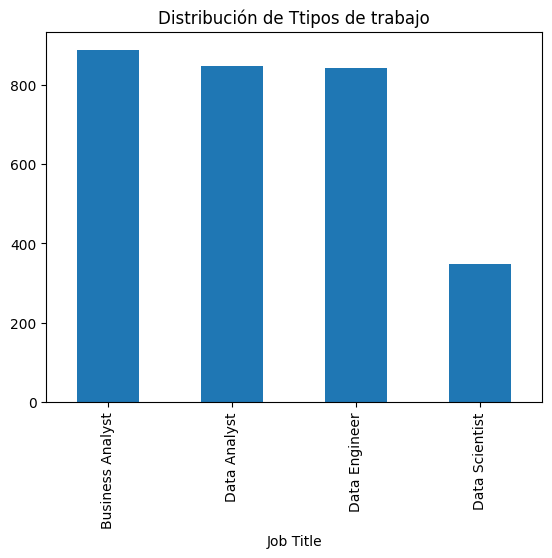

In [ ]:
trabajos_1 = ['Business Analyst', 'Data Analyst', 'Data Engineer', 'Data Scientist']
df[df['Job Title'].isin(trabajos_1)]['Job Title'].value_counts().plot(kind='bar')
plt.title('Distribución de Ttipos de trabajo')
plt.show()

Como vimos en los valores, los puestos senior son más buscados que otros perfiles (junior, p.e.). También es cierto que bajo las categorías de, por ejemplo, "analista de datos" (ver arriba) no podemos saber el grado de experiencia que se busca ni las funciones a desempeñar.

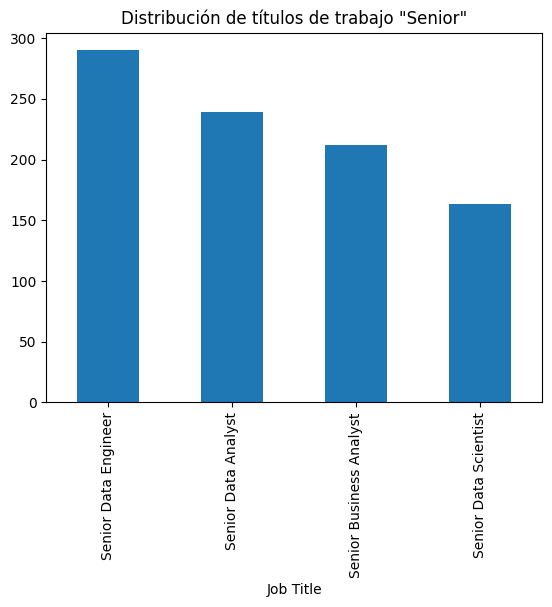

In [ ]:
trabajos_2 = ['Senior Data Engineer', 'Senior Data Analyst', 'Senior Business Analyst', 'Senior Data Scientist']
df[df['Job Title'].isin(trabajos_2)]['Job Title'].value_counts().plot(kind='bar')
plt.title('Distribución de títulos de trabajo "Senior"')
plt.show()

***SECTORES***

Pasamos a ver la distribución de los sectores. ¿Cuáles contratan más perfiles *data*? Al haber tantos sectores, hemos optamos por mostrar los 5 que más contratan y, el resto, agruparlos en "otros".

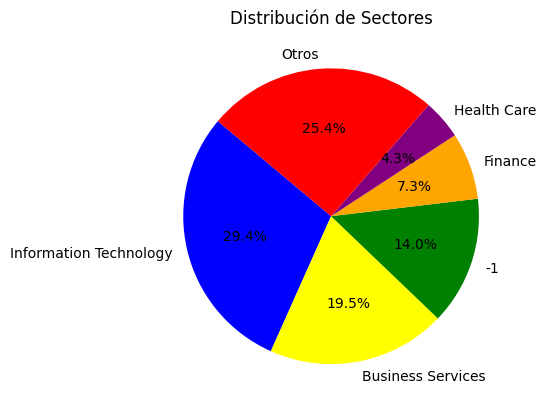

In [ ]:
df_filtrado = df[df['Sector'] != '-1']
conteo_sectores = df['Sector'].value_counts()
top_sectores = conteo_sectores[:5]
otros = conteo_sectores[5:].sum()
top_sectores['Otros'] = otros
colores = ['blue', 'yellow', 'green', 'orange', 'purple', 'red']
top_sectores.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors = colores)
plt.title('Distribución de Sectores')
plt.ylabel('')
plt.show()

***DESCRIPCIONES***

Pasamos a la parte más interesante (también la más compleja) de nuestro trabajo. ¿Qué se busca en cada tipo de trabajo? ¿Qué capacidades, formación, herramientas...? Esta parte del trabajo consiste en realizar un pequeño *text mining*. Para ello, lo primero es facilitar el trabajo de las palabras; realizar limpieza, agrupaciones, "traducciones", sustituciones...

In [ ]:
palabras_originales = ['COMPUTER SCIENCE','ENGINEERING DEGREE',' MS ','BUSINESS ANALYTICS','SCRUM MASTER',
                       'MACHINE LEARNING',' ML ','POWER BI','ARTIFICIAL INTELLIGENCE',' AI ','ALGORITHMS',
                       'DEEP LEARNING','NEURAL NETWORK','NATURAL LANGUAGE PROCESSING','DECISION TREE','CLUSTERING','PL SQL']

palabras_reemplazo = ['COMPUTER_SCIENCE','ENGINEERING_DEGREE',' MASTER ','BUSINESS_ANALYTICS','SCRUM_MASTER',
                      'MACHINE_LEARNING',' MACHINE_LEARNING ','POWER_BI','ARTIFICIAL_INTELLIGENCE',' ARTIFICIAL_INTELLIGENCE ',
                      'ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK','NATURAL_LANGUAGE_PROCESSING','DECISION_TREE','CLUSTER','PLSQL']

In [ ]:
for original, reemplazo in zip(palabras_originales, palabras_reemplazo):
    df['Job Description'] = df['Job Description'].str.replace(original, reemplazo, regex=True)

In [ ]:
import re

def crear_wordcloud_filtrado(titulo, palabras_interes):
    text = ' '.join(df[df['Job Title'] == titulo]['Job Description'].astype(str))
    palabras_filtradas = ' '.join(re.findall(r'\b(?:' + '|'.join(palabras_interes) + r')\b', text, flags=re.IGNORECASE))
    wordcloud = WordCloud(width=800, height=400).generate(palabras_filtradas)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Filtrado para {titulo}")
    plt.show()

Esta lista de palabras será de gran relevancia pues son aquellas palabras que denotan cuestiones técnicas específicas en los puestos *data*. 

In [ ]:
palabras_interes = ['COMPUTER_SCIENCE','MASTER','MBA','SQL','PYTHON','R','PHD','BUSINESS_ANALYTICS','SAS','PMP','SCRUM_MASTER','STATISTICS','MATHEMATICS','MACHINE_LEARNING','ARTIFICIAL_INTELLIGENCE','ECONOMICS','TABLEAU','AWS','AZURE','POWER_BI','ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK','NATURAL_LANGUAGE_PROCESSING','DECISION_TREE','REGRESSION','CLUSTER','ORACLE','EXCEL','TENSORFLOW','HADOOP','SPARK','NOSQL','SAP','ETL','API','PLSQL','MONGODB','POSTGRESQL','ELASTICSEARCH','REDIS','MYSQL','FIREBASE','SQLITE','CASSANDRA','DYNAMODB','OLTP','OLAP','DEVOPS','NETWORK','APACHE','SECURITY','MARKDOWN']

Creamos nubes de palabras para las descripciones de cada uno de los puestos *genéricos* con las palabras importantes que hemos señalado antes.

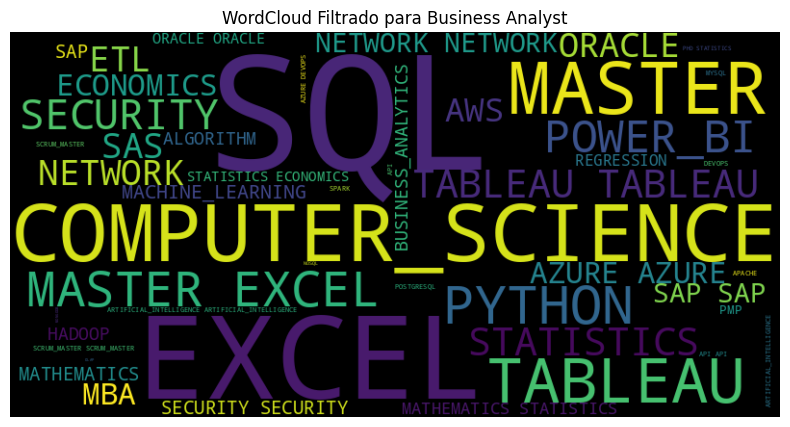

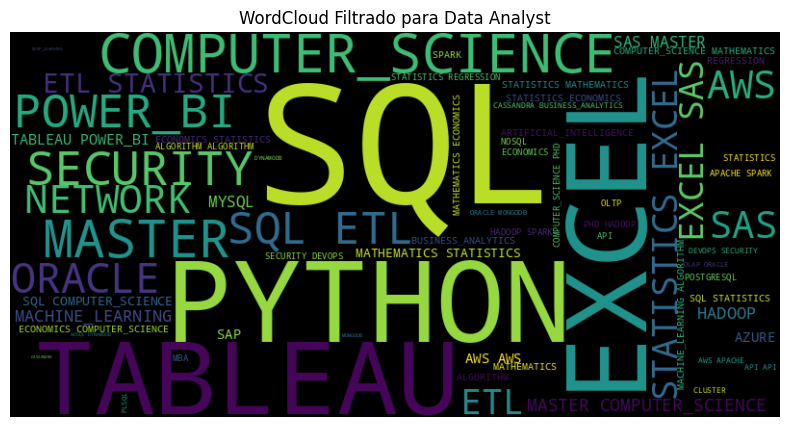

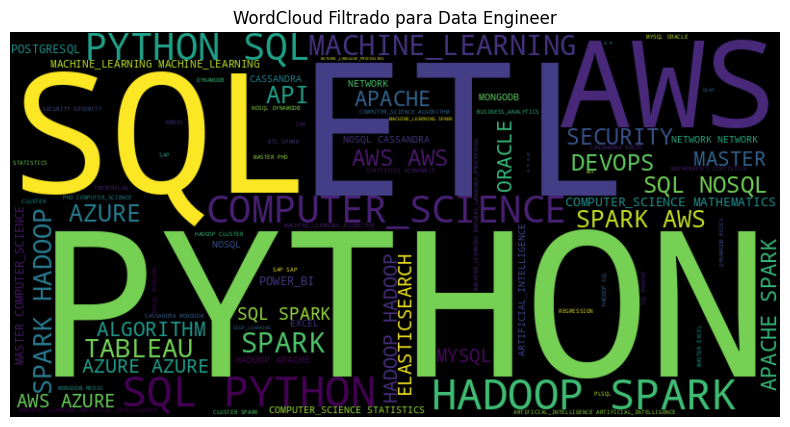

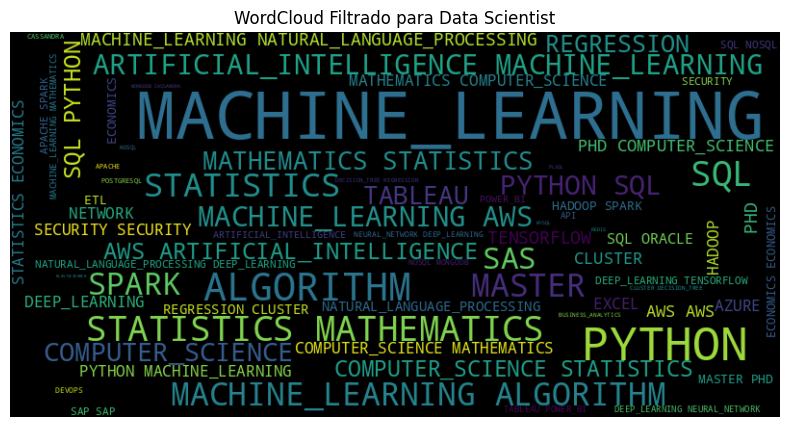

In [ ]:
for titulo in ['Business Analyst', 'Data Analyst', 'Data Engineer', 'Data Scientist']:
    crear_wordcloud_filtrado(titulo, palabras_interes)

Lo que hacemos ahora es algo similar, pero esta vez para excluir las palabras técnicas. De esta forma encontraremos otras cuestiones valoradas como habilidades, aptitudes, actitudes...

***SALARIOS***

Pasamos a la parte final en la que ahondamos en las distintas perspectivas salariales de cada puesto.

In [ ]:
df_ds = df[df['Job Title'] == 'Data Scientist']
df_da = df[df['Job Title'] == 'Data Analyst']
df_de = df[df['Job Title'] == 'Data Engineer']
df_ba = df[df['Job Title'] == 'Business Analyst']

In [ ]:
fig = px.histogram(df_ds, x='Salary_average', title='Salario promedio Data Scientist')
fig.show()

In [ ]:
fig = px.histogram(df_da, x='Salary_average', title='Salario promedio Data Analyst')
fig.show()

In [ ]:
fig = px.histogram(df_de, x='Salary_average', title='Salario promedio Data Engineer')
fig.show()

In [ ]:
fig = px.histogram(df_ba, x='Salary_average', title='Salario promedio Business Analyst')
fig.show()